In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI

In [4]:
model = ChatOpenAI(
    model_name="gpt-4o-mini"
)

In [ ]:
result = model.invoke("내 이름은 문벼리야")

In [ ]:
result.pretty_print()

In [ ]:
result=model.invoke("내 이름을 말해줘 그리고 내가 이해할 수 있는 수준으로 LLM에 대해 설명해줘")

In [ ]:
result.pretty_print()

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

In [ ]:
msg1 = [
    AIMessage(
        content="당신의 이름은 무엇입니까?",
        name="Model"
    )
]

In [ ]:
msg2 = [
    HumanMessage(
        content="내 이름은 벼리야",
        name="User"
    )
]

In [ ]:
msg3 = [
    AIMessage(
        content = "몇 살인지 물어봐도 될까요?",
        name="Model"
    )
]

In [ ]:
msg4 = [
    HumanMessage(
        content="나는 12살이야",
        name="User"
    )
]

In [ ]:
msg5 = [
    AIMessage(
        content = "오늘 무엇을 도와드릴까요?",
        name="Model"
    )
]

In [ ]:
msg6 = [
    HumanMessage(
        content="내 이름을 말해줘. 그리고 내가 이해할 수 있는 수준으로 LLM에 대해 설명해줘",
        name="User"
    )
]

In [ ]:
messages = []

In [ ]:
messages.extent(msg1)
messages.extent(msg2)
messages.extent(msg3)
messages.extent(msg4)
messages.extent(msg5)
messages.extent(msg6)

In [ ]:
for msg in messages:
    msg.pretty_print()

In [ ]:
result = model.invoke(messages)
result.pretty_print()

## simple graph

In [5]:
from typing_extensions import TypedDict

In [6]:
class State(TypedDict):
    number: int

In [7]:
def node(state: State):
    old_number = state["number"]
    new_number = old_number -1
    return{
        "number":new_number
    }

In [11]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node",node)
builder.add_edge(START, "node")
builder.add_edge("node",END)

graph = builder.compile()

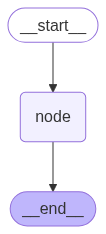

In [13]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [14]:
graph.invoke(
    {
        "number" : 13
    }
)


{'number': 12}

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
model = ChatOpenAI(
    model_name="gpt-4o-mini"
)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system", "you are a helpful assistant",
        ),
        (
            "Human", "Substract 1 from {number}. Return only the final outcome"
        )
    ]
)

In [ ]:
from langchain_core.output_parsers import StrOutputParser

In [ ]:
chain = prompt | model | StrOutputParser()

In [ ]:
def chatbot(state: State):
    old_number = state["number"]
    out = chain.invoke(
        {
            "number" : old_number
        }
    )
    new_number = int(out)

    return {
        "number" : new_number
    }

In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
graph = (
    StateGraph(State)
    .add_node(chatbot)
    .add_edge(START,"chatbot")
    .add_edge("chatbot",END)
    .compile()
)

In [ ]:
from IPython.display import Image, display
diagram = Image(graph.get_graph().draw_mermaid_png())

display(diagram)

In [ ]:
out = graph.invoke(
    {
        "number" : 13
    }
)

In [ ]:
out